In [ ]:
# Input a 2D pollutied data set within normal distributed noise.



# Dataset pre-treatment
## Import and draw
(The data has polluted in three parts: background, position(x and y coordinate) and value noise(the dependent number))

<IPython.core.display.Javascript object>


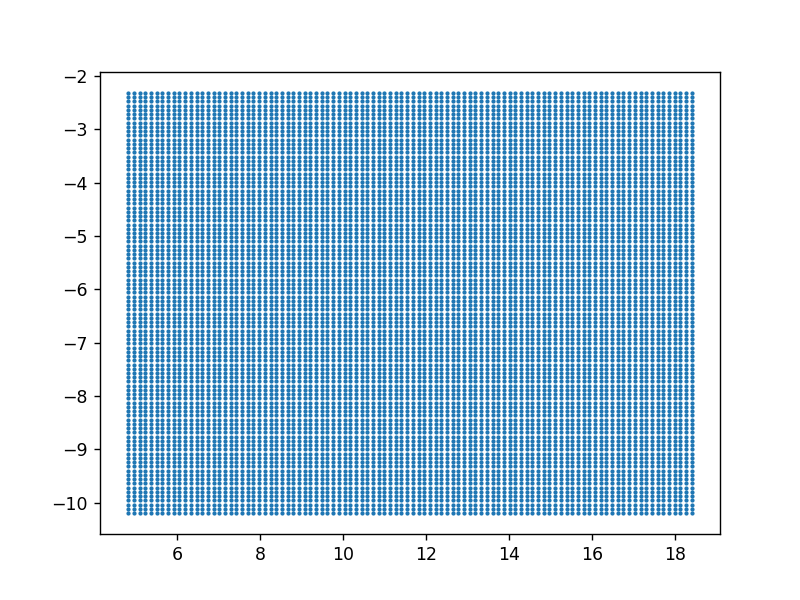

<IPython.core.display.Javascript object>


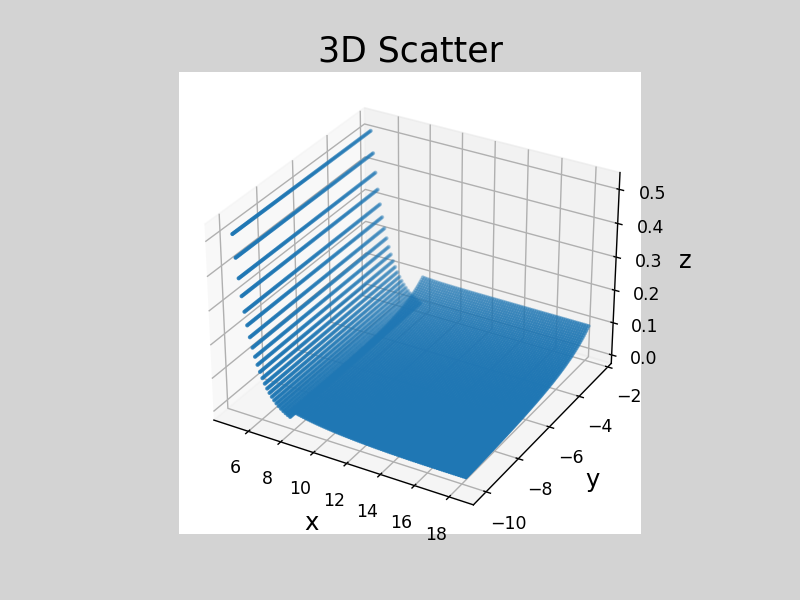

In [11]:
%reset -f
%clear
import numpy as np
import copy
import matplotlib.pyplot as plt 
plt.close('all')
import scipy.io as scio
from mpl_toolkits.mplot3d import axes3d
import pandas as pd

DataF = scio.loadmat('OriginData.mat')
DataF = DataF['lambda']
DataX = scio.loadmat('OriginX.mat')
DataX = DataX['x2D']
DataY = scio.loadmat('OriginY.mat')
DataY = DataY['y2D']

# DataF = scio.loadmat('PollutedData.mat')
# DataF = DataF['DataP']
# DataX = scio.loadmat('PollutedPositionX.mat')
# DataX = DataX['PositionXP']
# DataY = scio.loadmat('PollutedPositionY.mat')
# DataY = DataY['PositionYP']

%matplotlib notebook
plt.scatter(DataX, DataY, s = 2)
plt.show()

plt.figure("3D Scatter", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('3D Scatter', fontsize=20)
ax3d.set_xlabel('x', fontsize=14)
ax3d.set_ylabel('y', fontsize=14)
ax3d.set_zlabel('z', fontsize=14)
plt.tick_params(labelsize=10)

ax3d.scatter(DataX, DataY, DataF, s = 2)
plt.show()

NoPs = int(np.sqrt(len(DataX)))

# Import data and draw.
# Figure 1 is polluted x-y position
# Figure 2 shown whole data

## Boundary rescure

A boundary reflection algorithm, in order to trim the excessed data from voronoi cell generation package 
<img src="Pt1.png" width="100"/>
The above figure demostrated the basic idea of the boundary reflection algorithm. The black dash line in the middle is frame line which could be identified from origion data abd served as reflection reference.

m1 and m2 are the target line inside the data domain, m1m and m2m are reflected line which generate by reflection algorithm

The algorithm first go to a random boundary line, then go to the neibour line to compensate the extra point who appear in each corner

<IPython.core.display.Javascript object>


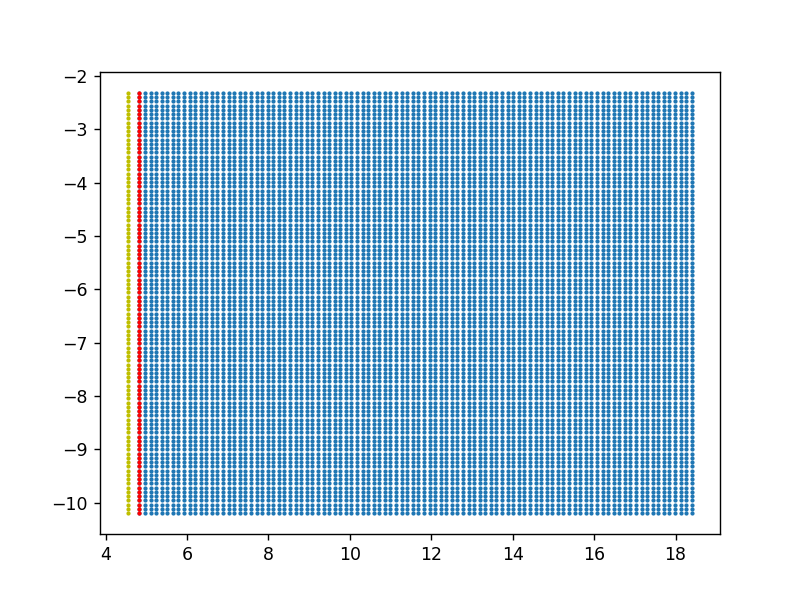

10100
101
101


<IPython.core.display.Javascript object>


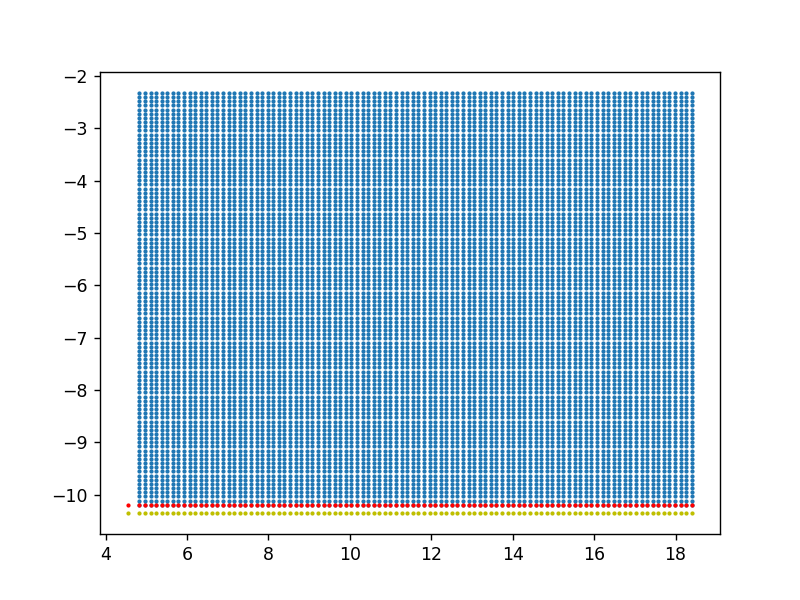

<IPython.core.display.Javascript object>


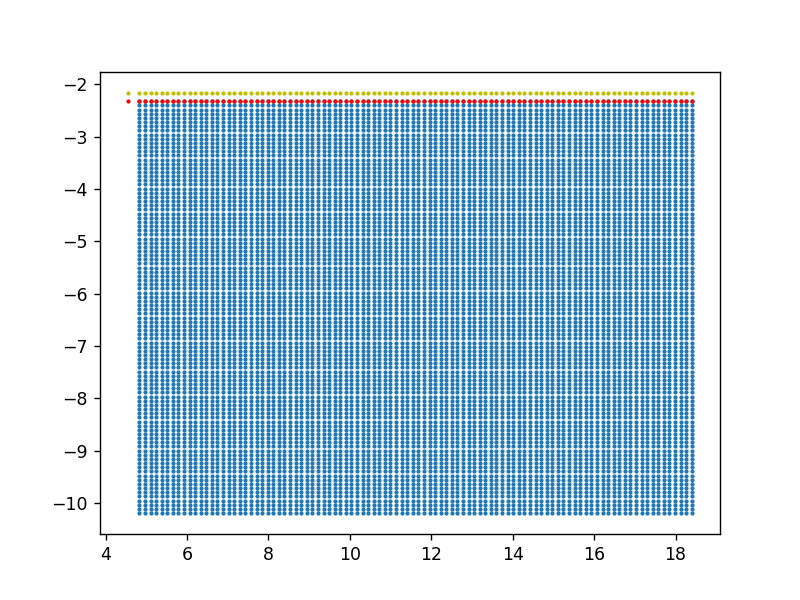

<IPython.core.display.Javascript object>


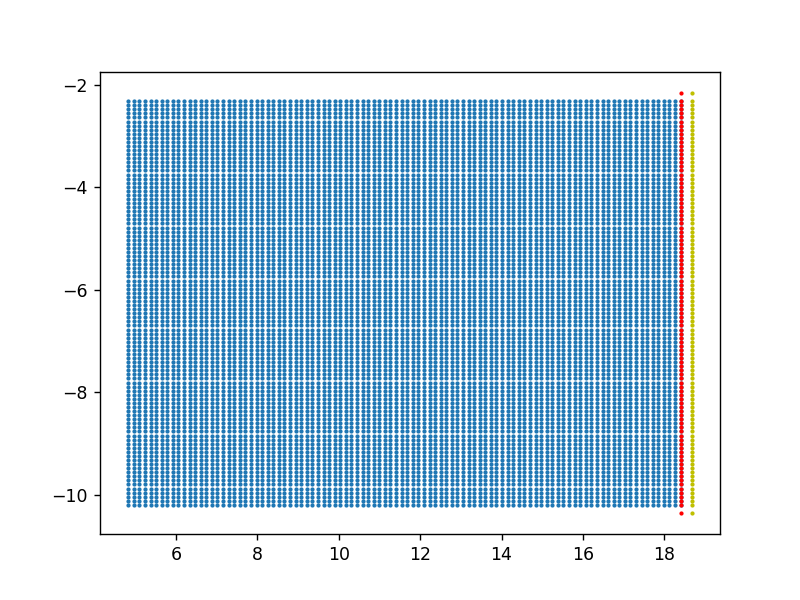

<IPython.core.display.Javascript object>


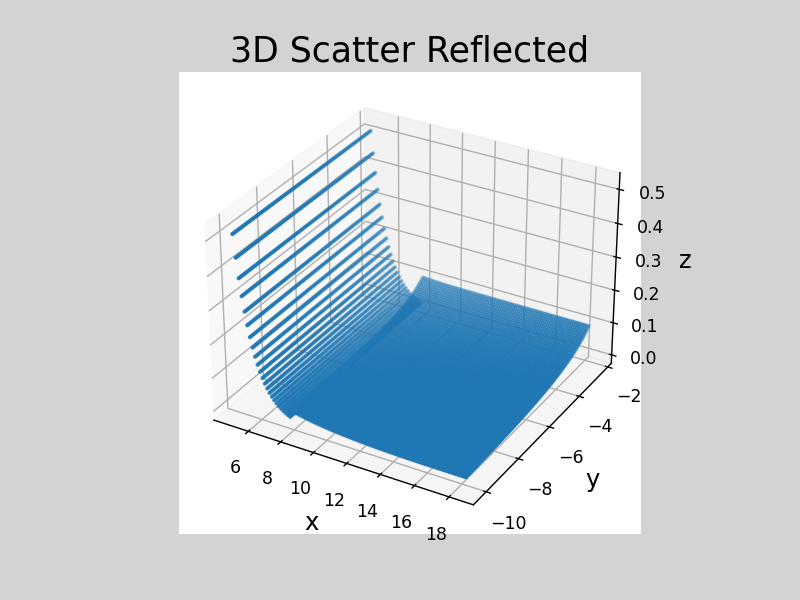

In [12]:
def indexofMin(arr):
    minindex = 0
    currentindex = 1
    while currentindex < len(arr):
        if arr[currentindex] < arr[minindex]:
            minindex = currentindex
        currentindex += 1
    return minindex

def indexofMax(arr):
    maxindex = 0
    currentindex = 1
    while currentindex < len(arr):
        if arr[currentindex] > arr[maxindex]:
            maxindex = currentindex
        currentindex += 1
    return maxindex

X_mid = (max(DataX) - min(DataX))/2 + min(DataX)
Y_mid = (max(DataY) - min(DataY))/2 + min(DataY)

#X Minimum
Pt_loop_Xmin = np.linspace(0, 99, num = 100, dtype = int)
DataX_Xmin_PrT = copy.deepcopy(DataX)
DataY_Xmin_PrT = copy.deepcopy(DataY)
Pt_XMinx_Frame = np.zeros((100,1))
Pt_XMiny_Frame = np.zeros((100,1))
Pt_XMinx_M1 = np.zeros((100,1))
Pt_XMiny_M1 = np.zeros((100,1))

#Frame - The reference line
for PtN in Pt_loop_Xmin:
    PT_temp = indexofMin(DataX_Xmin_PrT)
    Pt_XMinx_Frame[PtN] = DataX_Xmin_PrT[PT_temp]
    Pt_XMiny_Frame[PtN] = DataY_Xmin_PrT[PT_temp]
    DataX_Xmin_PrT[PT_temp] = X_mid
    DataY_Xmin_PrT[PT_temp] = Y_mid

# M1 & M1m Line 
for PtN in Pt_loop_Xmin:
    PT_temp = indexofMin(DataX_Xmin_PrT)
    Pt_XMinx_M1[PtN] = DataX_Xmin_PrT[PT_temp]
    Pt_XMiny_M1[PtN] = DataY_Xmin_PrT[PT_temp]

# Cutting Reflection
Pt_XMinx_FrameR = -1 * Pt_XMinx_Frame
Xmin_Offset = np.abs(np.mean(Pt_XMinx_Frame - Pt_XMinx_M1))
Xmin_GAP = np.abs(np.mean(Pt_XMinx_Frame - Pt_XMinx_FrameR))
Pt_XMinx_CR = Pt_XMinx_FrameR + Xmin_GAP - Xmin_Offset * 2

DataX_xmin_Pt = np.vstack((DataX, Pt_XMinx_CR))
DataY_xmin_Pt = np.vstack((DataY, Pt_XMiny_Frame))

plt.figure()
plt.scatter(DataX, DataY, s = 2)
plt.scatter(Pt_XMinx_Frame, Pt_XMiny_Frame, s = 2, c = 'r')
plt.scatter(Pt_XMinx_CR, Pt_XMiny_Frame, s = 2, c = 'y')
plt.show()

print(len(DataX_xmin_Pt))

# Left boundary reflection 
# Yellow reflected points, Red Reference points

#Y Minimum
Pt_loop_Ymin = np.linspace(0, 100, num = 101, dtype = int)
DataX_Ymin_PrT = copy.deepcopy(DataX_xmin_Pt)
DataY_Ymin_PrT = copy.deepcopy(DataY_xmin_Pt)
Pt_YMinx_Frame = np.zeros((101, 1))
Pt_YMiny_Frame = np.zeros((101, 1))
Pt_YMinx_M1 = np.zeros((101, 1))
Pt_YMiny_M1 = np.zeros((101, 1)) 

#Frame - The reference line
for PtN in Pt_loop_Ymin:
    PT_temp = indexofMin(DataY_Ymin_PrT)
    Pt_YMinx_Frame[PtN] = DataX_Ymin_PrT[PT_temp]
    Pt_YMiny_Frame[PtN] = DataY_Ymin_PrT[PT_temp]
    DataX_Ymin_PrT[PT_temp] = X_mid
    DataY_Ymin_PrT[PT_temp] = Y_mid

# M1 & M1m Line 
for PtN in Pt_loop_Ymin:
    PT_temp = indexofMin(DataY_Ymin_PrT)
    Pt_YMinx_M1[PtN] = DataX_Ymin_PrT[PT_temp]
    Pt_YMiny_M1[PtN] = DataY_Ymin_PrT[PT_temp]

# M2m offset
Pt_YMiny_FrameR = -1 * Pt_YMiny_Frame
Ymin_Offset = np.abs(np.mean(Pt_YMiny_Frame - Pt_YMiny_M1))
Ymin_GAP = np.abs(np.mean(Pt_YMiny_Frame - Pt_YMiny_FrameR))
Pt_YMiny_CR = Pt_YMiny_FrameR - Ymin_GAP - Ymin_Offset * 2

# DataLEGO
DataX_ymin_Pt = np.vstack((DataX_xmin_Pt, Pt_YMinx_Frame))
DataY_ymin_Pt = np.vstack((DataY_xmin_Pt, Pt_YMiny_CR))

print(len(Pt_YMinx_Frame))
print(len(Pt_YMiny_CR))
plt.figure()
plt.scatter(DataX, DataY, s = 2)
plt.scatter(Pt_YMinx_Frame, Pt_YMiny_Frame, s = 2, c = 'r')
plt.scatter(Pt_YMinx_Frame, Pt_YMiny_CR, s = 2, c = 'y')
plt.show()

# Bottom boundary reflection. it worth to mention the amount of points were rises

#Y Maximum
Pt_loop_Ymax = np.linspace(0, 100, num = 101, dtype = int)
DataX_Ymax_PrT = copy.deepcopy(DataX_ymin_Pt)
DataY_Ymax_PrT = copy.deepcopy(DataY_ymin_Pt)
Pt_YMaxx_Frame = np.zeros((101, 1))
Pt_YMaxy_Frame = np.zeros((101, 1))
Pt_YMaxx_M1 = np.zeros((101, 1))
Pt_YMaxy_M1 = np.zeros((101, 1)) 

#Frame - The reference line
for PtN in Pt_loop_Ymax:
    PT_temp = indexofMax(DataY_Ymax_PrT)
    Pt_YMaxx_Frame[PtN] = DataX_Ymax_PrT[PT_temp]
    Pt_YMaxy_Frame[PtN] = DataY_Ymax_PrT[PT_temp]
    DataX_Ymax_PrT[PT_temp] = X_mid
    DataY_Ymax_PrT[PT_temp] = Y_mid

# M1 & M1m Line 
for PtN in Pt_loop_Ymax:
    PT_temp = indexofMax(DataY_Ymax_PrT)
    Pt_YMaxx_M1[PtN] = DataX_Ymax_PrT[PT_temp]
    Pt_YMaxy_M1[PtN] = DataY_Ymax_PrT[PT_temp]

# M2m offset
Pt_YMaxy_FrameR = -1 * Pt_YMaxy_Frame
Ymax_Offset = np.abs(np.mean(Pt_YMaxy_Frame - Pt_YMaxy_M1))
Ymax_GAP = np.abs(np.mean(Pt_YMaxy_Frame - Pt_YMaxy_FrameR))
Pt_YMaxy_CR = Pt_YMaxy_FrameR - Ymax_GAP + Ymax_Offset * 2

# DataLEGO
DataX_Ymax_Pt = np.vstack((DataX_ymin_Pt, Pt_YMaxx_Frame))
DataY_Ymax_Pt = np.vstack((DataY_ymin_Pt, Pt_YMaxy_CR))

plt.figure()
plt.scatter(DataX, DataY, s = 2)
plt.scatter(Pt_YMaxx_Frame, Pt_YMaxy_Frame, s = 2, c = 'r')
plt.scatter(Pt_YMaxx_Frame, Pt_YMaxy_CR, s = 2, c = 'y')
plt.show()

#X Maximum
Pt_loop_Xmax = np.linspace(0, 101, num = 102, dtype = int)
DataX_Xmax_PrT = copy.deepcopy(DataX_Ymax_Pt)
DataY_Xmax_PrT = copy.deepcopy(DataY_Ymax_Pt)
Pt_XMaxx_Frame = np.zeros((102, 1))
Pt_XMaxy_Frame = np.zeros((102, 1))
Pt_XMaxx_M1 = np.zeros((102, 1))
Pt_XMaxy_M1 = np.zeros((102, 1)) 

#Frame - The reference line
for PtN in Pt_loop_Xmax:
    PT_temp = indexofMax(DataX_Xmax_PrT)
    Pt_XMaxx_Frame[PtN] = DataX_Xmax_PrT[PT_temp]
    Pt_XMaxy_Frame[PtN] = DataY_Xmax_PrT[PT_temp]
    DataX_Xmax_PrT[PT_temp] = X_mid
    DataY_Xmax_PrT[PT_temp] = Y_mid

# M1 & M1m Line 
for PtN in Pt_loop_Xmax:
    PT_temp = indexofMax(DataX_Xmax_PrT)
    Pt_XMaxx_M1[PtN] = DataX_Xmax_PrT[PT_temp]
    Pt_XMaxy_M1[PtN] = DataY_Xmax_PrT[PT_temp]

# M2m offset
Pt_XMaxx_FrameR = -1 * Pt_XMaxx_Frame
Xmax_Offset = np.abs(np.mean(Pt_XMaxx_Frame - Pt_XMaxx_M1))
Xmax_GAP = np.abs(np.mean(Pt_XMaxx_Frame - Pt_XMaxx_FrameR))
Pt_XMaxx_CR = Pt_XMaxx_FrameR + Xmax_GAP + Xmax_Offset * 2

# DataLEGO
DataX_Xmax_Pt = np.vstack((DataX_Ymax_Pt, Pt_XMaxx_CR))
DataY_Xmax_Pt = np.vstack((DataY_Ymax_Pt, Pt_XMaxy_Frame))

plt.figure()
plt.scatter(DataX, DataY, s = 2)
plt.scatter(Pt_XMaxx_Frame, Pt_XMaxy_Frame, s = 2, c = 'r')
plt.scatter(Pt_XMaxx_CR, Pt_XMaxy_Frame, s = 2, c = 'y')
plt.show()

plt.figure("3D Scatter Reflected", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('3D Scatter Reflected', fontsize = 20)
ax3d.set_xlabel('x', fontsize = 14)
ax3d.set_ylabel('y', fontsize = 14)
ax3d.set_zlabel('z', fontsize = 14)
plt.tick_params(labelsize = 10)
ax3d.scatter(DataX, DataY, DataF, s = 2)
plt.show()

# The whole data looks like, after boundary rescure

## Engage Voronoi cell  

Import voronoi cell package to determine the inflence area for each data point. The peckage is so crude that we need apply another boundary treatment afterward.

<IPython.core.display.Javascript object>


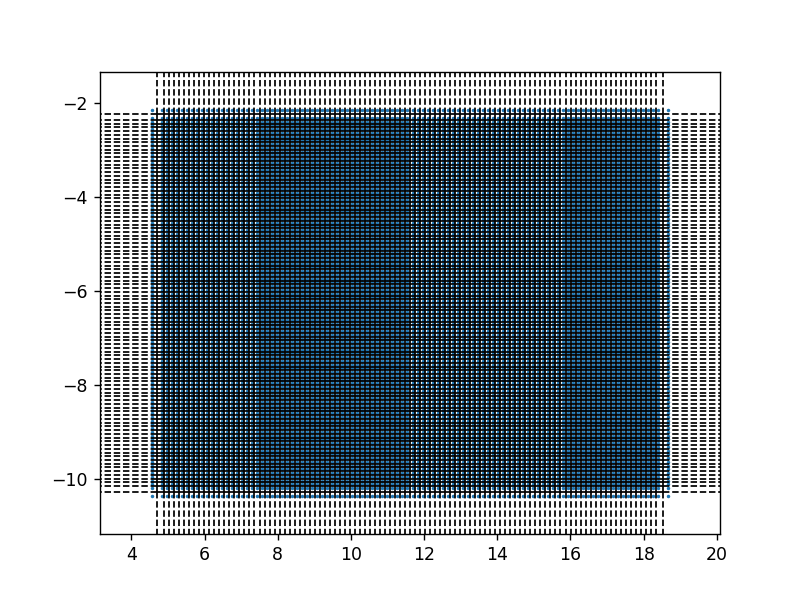

In [13]:
from scipy.spatial import Voronoi, voronoi_plot_2d, ConvexHull
Data2D_x = copy.deepcopy(DataX_Xmax_Pt)
Data2D_y = copy.deepcopy(DataY_Xmax_Pt)
Data2D = np.hstack((Data2D_x, Data2D_y))
type(Data2D)

vor = Voronoi(Data2D)
vor_vertices = copy.deepcopy(vor.vertices)
vor_regions = copy.deepcopy(vor.regions)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='black', point_size=2)
plt.show()

# The crude votonoi cell, the boundary was tend to infinity

## Trimming Voronoi cell
The rige of our data field out of our boundary even tend to infinity, when 
apply the packed voronoi cell generation algorithm. Though, by now we got to trim off the 
exceeded points and make sure the polygon keep convex.

10405
18.60613760682149
-2.2035698938770776
-10.389866135712055
4.485581800249587
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
YG
XG
XG
XG
XG
XG
YG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
YG
YG
XG
YG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG
XG


<IPython.core.display.Javascript object>


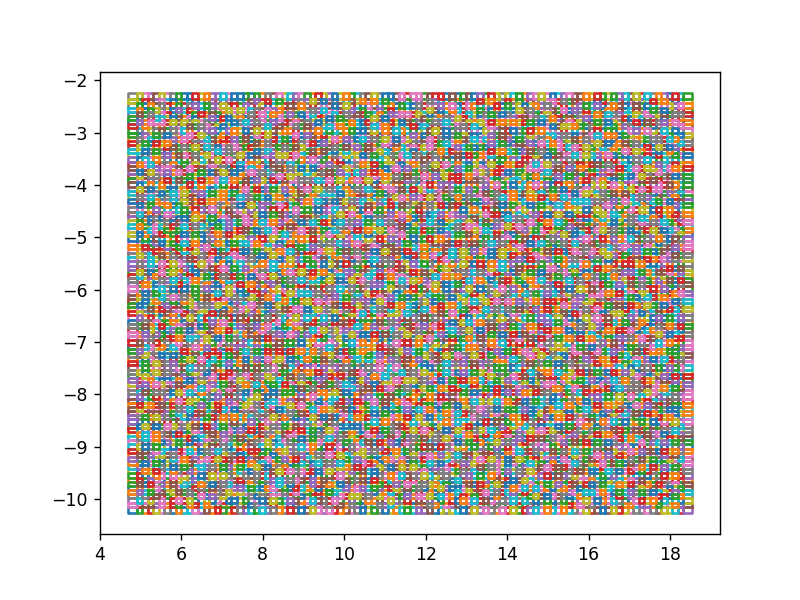

10000


In [14]:
NoVoronoiCell = len(vor.regions)
print(NoVoronoiCell)
V_vertices_x = copy.deepcopy(vor.vertices[:, 0])
V_vertices_y = copy.deepcopy(vor.vertices[:, 1])

V_coord_x = [ [] for _ in range(NoVoronoiCell) ]
V_coord_y = [ [] for _ in range(NoVoronoiCell) ]

XMax = np.max(Pt_XMaxx_CR - 0.5 * Xmax_Offset)
print(XMax)
YMax = np.max(Pt_YMaxy_CR - 0.5 * Ymax_Offset)
print(YMax)
YMin = np.max(Pt_YMiny_CR - 0.5 * Ymin_Offset)
print(YMin)
XMin = np.max(Pt_XMinx_CR - 0.5 * Xmin_Offset)
print(XMin)

# Delete the exceed points which behind or wothin 'The frame' in 
# section 1.2 boundary secure
XGrid_ST = (XMax - XMin)/NoPs
YGrid_ST = (YMax - YMin)/NoPs
VEmptyCount = 0
for i in range(NoVoronoiCell):

    DeleteHint = 0;
    VL_Temp = len(vor.regions[i])

    if VL_Temp == 0:
        continue
        
    V_coord_x[i] = np.zeros(VL_Temp)
    V_coord_y[i] = np.zeros(VL_Temp)
    Ori_Check_x = np.zeros(VL_Temp)
    Ori_Check_y = np.zeros(VL_Temp)
    
    for j in range(VL_Temp):
        NoC = vor.regions[i][j]
        V_coord_x[i][j] = V_vertices_x[NoC]
        V_coord_y[i][j] = V_vertices_y[NoC]
        Ori_Check_x[j] = V_vertices_x[NoC]
        Ori_Check_y[j] = V_vertices_y[NoC]
        
        if V_coord_x[i][j] < XMin:

            V_coord_x[i] = []
            V_coord_y[i] = []
            VEmptyCount = VEmptyCount + 1
            DeleteHint = 1
            break
        elif V_coord_x[i][j] > XMax:
            V_coord_x[i] = []
            V_coord_y[i] = []
            VEmptyCount = VEmptyCount + 1
            DeleteHint = 1
            break
        elif V_coord_y[i][j] > YMax: 
            V_coord_x[i] = []
            V_coord_y[i] = []
            VEmptyCount = VEmptyCount + 1
            DeleteHint = 1
            break
        elif V_coord_y[i][j] < YMin:
            V_coord_x[i] = []
            V_coord_y[i] = []
            VEmptyCount = VEmptyCount + 1
            DeleteHint = 1
            break
    Cell_STD_x = np.std(V_coord_x[i])
    Cell_STD_y = np.std(V_coord_y[i])
    
    if Cell_STD_x > XGrid_ST * 2:
        V_coord_x[i] = []
        V_coord_y[i] = []
        VEmptyCount = VEmptyCount + 1
        DeleteHint = 1
#         print('XG')
    elif Cell_STD_y > YGrid_ST * 2:
        V_coord_x[i] = []
        V_coord_y[i] = []
        VEmptyCount = VEmptyCount + 1
        DeleteHint = 1
#         print('YG')

    if DeleteHint == 0:                
        V_coord_x[i] = np.append(V_coord_x[i], V_coord_x[i][0])
        V_coord_y[i] = np.append(V_coord_y[i], V_coord_y[i][0])
    
#     print('Cell x', Cell_STD_x)
#     print('ST x', XGrid_ST)
#     print('Cell y', Cell_STD_y)
#     print('ST x', YGrid_ST)

NewIndex = 0
NewV_coord_x = list()
NewV_coord_y = list()
for NoC in range(len(vor.regions)):
    if len(V_coord_x[NoC]) == 0:
        continue
    elif len(V_coord_x[NoC]) != 0 and NewIndex == 0:
        NewV_coord_x.append(V_coord_x[NoC])
        NewV_coord_y.append(V_coord_y[NoC])
        NewIndex = NewIndex + 1
    else:
        NewV_coord_x.append(V_coord_x[NoC])
        NewV_coord_y.append(V_coord_y[NoC])
        NewIndex = NewIndex + 1

plt.figure()
for i in range(NewIndex): 

    plt.plot(NewV_coord_x[i], NewV_coord_y[i])
plt.show()  
print(NewIndex)
# print(NoC)

## Setting interpretation points

5.409033705173464 -2.6349438478320195
5.409033705173464 -10.50410041395589
18.982436038464247 -2.6349438478320195
18.982436038464247 -10.50410041395589


<IPython.core.display.Javascript object>


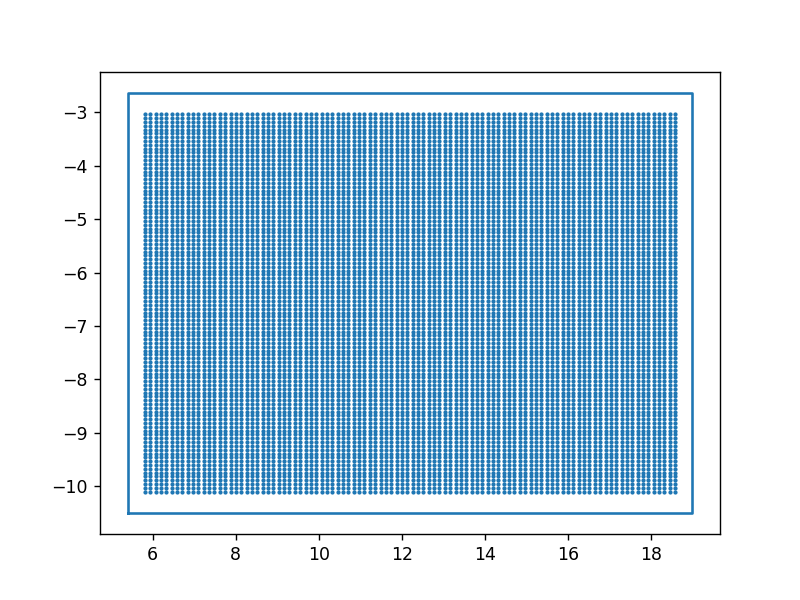

In [6]:
Interprete_LeftUp_x = np.mean(Pt_XMinx_Frame)
Interprete_LeftUp_y = np.mean(Pt_YMaxy_Frame)
Interprete_LeftDown_x = np.mean(Pt_XMinx_Frame)
Interprete_LeftDown_y = np.mean(Pt_YMiny_Frame)
Interprete_RightUp_x = np.mean(Pt_XMaxx_Frame)
Interprete_RightUp_y = np.mean(Pt_YMaxy_Frame)
Interprete_RightDown_x = np.mean(Pt_XMaxx_Frame)
Interprete_RightDown_y = np.mean(Pt_YMiny_Frame)

print(Interprete_LeftUp_x, Interprete_LeftUp_y)
print(Interprete_LeftDown_x, Interprete_LeftDown_y)
print(Interprete_RightUp_x, Interprete_RightUp_y)
print(Interprete_RightDown_x, Interprete_RightDown_y)

n = 100
xData = np.linspace(Interprete_LeftUp_x + 0.4, Interprete_RightUp_x - 0.4, num = n)
yData = np.linspace(Interprete_LeftDown_y + 0.4, Interprete_LeftUp_y - 0.4, num = n)
xPlot = np.zeros((n*n))
yPlot = np.zeros((n*n))

for xIndex in range(n):
    for yIndex in range(n):
        xPlot[xIndex  * n + yIndex] = xData[xIndex]
        yPlot[xIndex  * n + yIndex] = yData[yIndex]

xFrame = [Interprete_LeftUp_x, Interprete_LeftDown_x, Interprete_RightDown_x, Interprete_RightUp_x, Interprete_LeftUp_x]
yFrame = [Interprete_LeftDown_y, Interprete_LeftUp_y, Interprete_RightUp_y, Interprete_RightDown_y, Interprete_LeftDown_y]

plt.figure()       
plt.scatter(xPlot, yPlot, s = 2)
plt.plot(xFrame, yFrame)
plt.plot()
plt.show()

QuiryPoints = pd.DataFrame({'xPlot':xPlot, 'yPlot':yPlot})
QuiryPoints.to_csv("QuiryPoints.csv", index = False, sep = ',')

## ConvexHull volume

163.77146490301666
10000
0.016377146490301666
0.009999999999999998


<IPython.core.display.Javascript object>


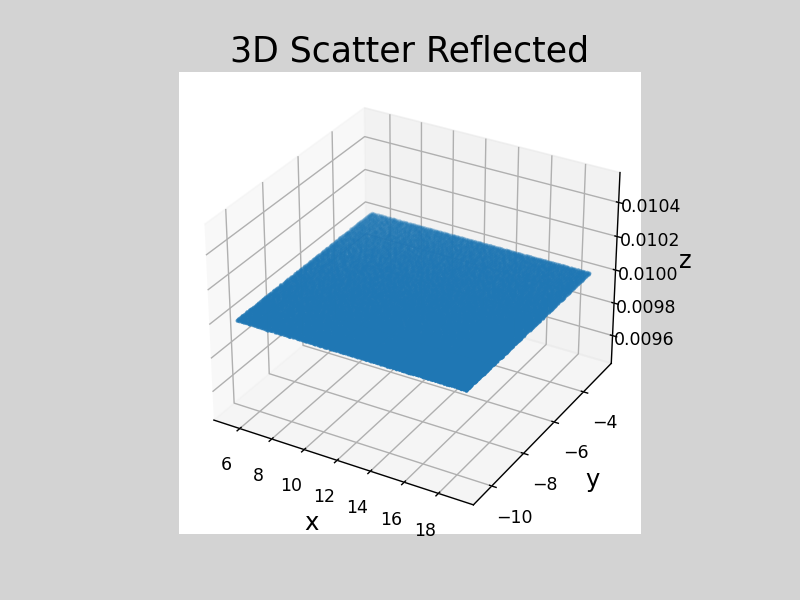

0.009999999999999998


In [12]:
VolVoeSubj = np.zeros(NewIndex)
VolVoeObjec = np.zeros(NewIndex)

for i in range(NewIndex):
    CellL = len(NewV_coord_y[0])
    xxx = np.zeros((CellL, 2))
    for j in range(CellL):
        
        xxx[j][0] = NewV_coord_x[0][j]
        xxx[j][1] = NewV_coord_y[0][j]

    vvvv = ConvexHull(xxx)
    VolVoeSubj[i] = vvvv.volume
StandardV = np.mean(VolVoeSubj)

for i in range(NewIndex):
#     VolVoeObjec[i] = VolVoeSubj[i] / StandardV
    VolVoeObjec[i] = VolVoeSubj[i] / StandardV * 0.01

    
print(np.sum(VolVoeSubj))
print(len(VolVoeSubj))
print(StandardV)
print(np.mean(VolVoeObjec))

plt.figure("Volumn", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('3D Scatter Reflected', fontsize = 20)
ax3d.set_xlabel('x', fontsize = 14)
ax3d.set_ylabel('y', fontsize = 14)
ax3d.set_zlabel('z', fontsize = 14)
plt.tick_params(labelsize = 10)
ax3d.scatter(DataX, DataY, VolVoeObjec, s = 2)
plt.show()

print(np.mean(VolVoeObjec))

## SmoothInterpolation parameter

In [13]:
from numba import jit
import math
import copy

Trimed_x = copy.deepcopy(DataX.transpose())
Trimed_x = np.array(Trimed_x)[0, :]
Trimed_y = copy.deepcopy(DataY.transpose())
Trimed_y = np.array(Trimed_y)[0, :]
Data_Trimed_F = copy.deepcopy(DataF.transpose())
Data_Trimed_F = np.array(Data_Trimed_F)[0, :]

print(Trimed_x)

h_0 = 0.6
h_1 = 3
hn = 100
h_num = np.zeros(100)

@jit(nopython=True)
def DistanceAll(xPlot, yPlot, Data_Trimed_xT, Data_Trimed_yT, h_0, h_1, hn, h_num, VolVoeObjec):
    N_Data = len(Data_Trimed_xT)
    N_Quiry = len(xPlot)
    rij = np.zeros((N_Quiry, N_Data))
    dFdx = np.zeros((N_Quiry, N_Data))
    dFdy = np.zeros((N_Quiry, N_Data))

    for i in range(N_Quiry):
        for j in range(N_Data):
            
            xij = xPlot[i] - Data_Trimed_xT[j]
            yij = yPlot[i] - Data_Trimed_yT[j]
            rij[i,j] = np.sqrt(xij * xij + yij * yij);
            
            dFdx[i, j] = xij / rij[i,j]
            dFdy[i, j] = yij / rij[i,j]
            
            if dFdx[i, j] is None:
                dFdx[i, j] = 0
            if dFdy[i, j] is None:
                dFdy[i, j] = 0
            
    W_Gauij = np.zeros((N_Quiry, hn))
    for k in range(hn):
        
        h_num[k] = (((h_1 - h_0) / hn)) * k + h_0
        aGau = 1 / (math.pi * h_num[k] * h_num[k])
        
        for i in range(N_Quiry):
            W_Gauij[i, k] = 0
            for j in range(N_Data):
                
                q = rij[i, j] / h_num[k]
                W_GauN = aGau * math.exp( -1 * math.pow(q, 2))
                W_Gauij[i, k] = W_Gauij[i, k] + W_GauN * VolVoeObjec[i]

    return(rij, W_Gauij, h_num, dFdx, dFdy)
 
rij_Vari, W_Gau_Var, h_num, dFdx, dFdy = DistanceAll(xPlot, yPlot, Trimed_x, Trimed_y, h_0, h_1, hn, h_num, VolVoeObjec)

[ 5.4232244   5.53764135  5.69471559 ... 18.69004415 18.84199911
 18.9721587 ]


<IPython.core.display.Javascript object>


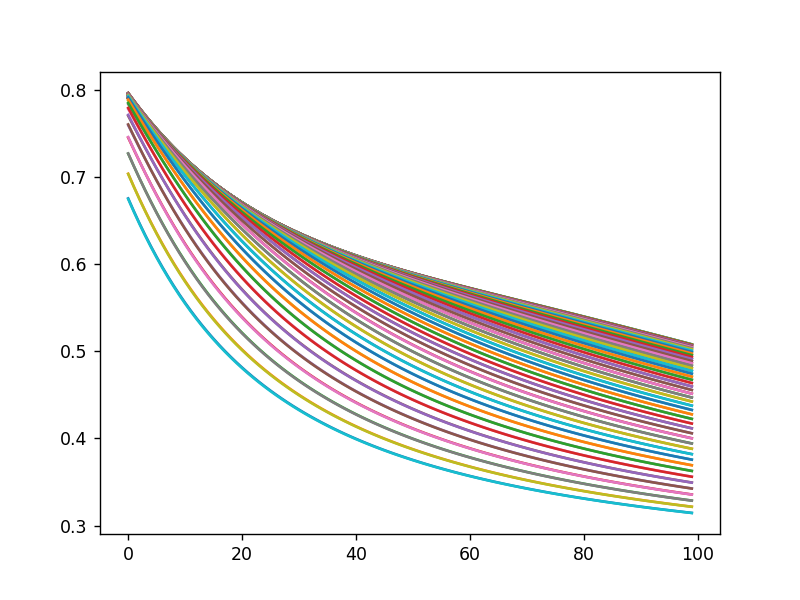

In [14]:
plotC = np.linspace(0, 99, num = 100, dtype = int)

plt.figure() 
for i in range (100):
    Wlog = W_Gau_Var[i, :]
    plt.plot(plotC, Wlog)
plt.show()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


<IPython.core.display.Javascript object>


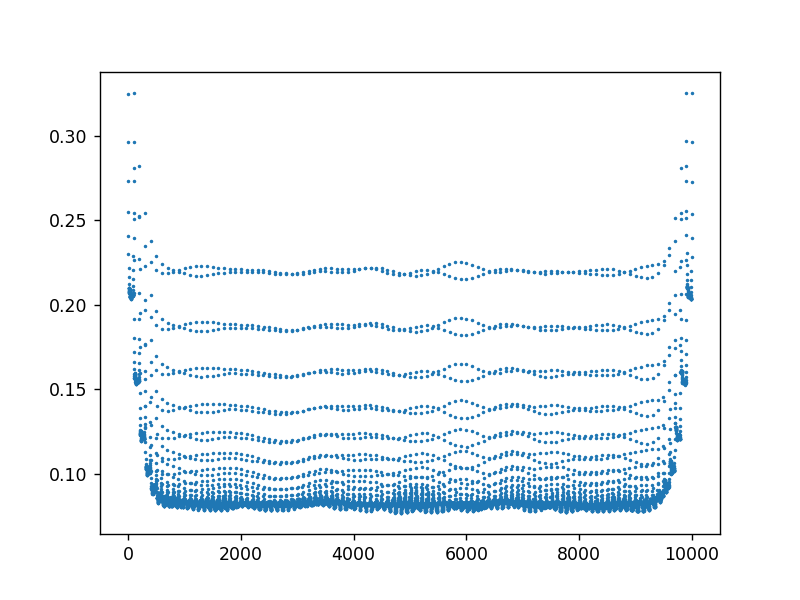

<IPython.core.display.Javascript object>


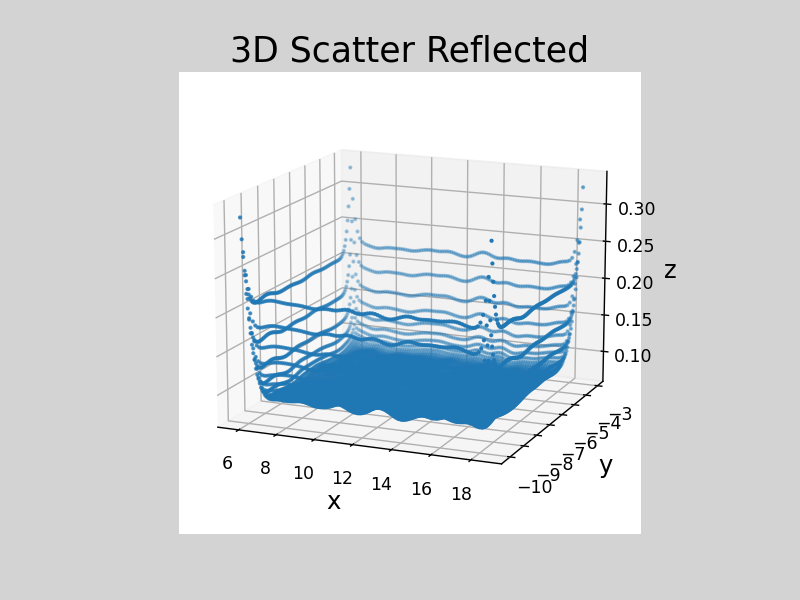

In [15]:
import copy
WR_MinMatrix = np.abs(np.abs(copy.deepcopy(W_Gau_Var)) - 1)
WR_Min = np.zeros(10000)
WR_h_CoordR = np.zeros(10000)
h_Fix = np.zeros(10000)

for i in range(10000):
    WR_Min[i] = WR_MinMatrix[i, :].min()
    WR_h_Coord = indexofMin(WR_MinMatrix[i, :])
    WR_h_Coord = int(WR_h_Coord)
#     print(WR_Min[i])
#     print(type(WR_h_Coord))
    print(WR_h_Coord)
#     print(WR_MinMatrix[i, WR_h_Coord])
    WR_h_CoordR[i] = WR_h_Coord
#     print(WR_h_CoordR[i])
    h_Fix[i] = h_num[WR_h_Coord]
    
plotCOut = np.linspace(0, 9999, num = 10000, dtype = int)    
plt.figure()
plt.scatter(plotCOut, WR_Min, s = 1)
plt.show()

plt.figure("The unified property in position", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('3D Scatter Reflected', fontsize=20)
ax3d.set_xlabel('x', fontsize=14)
ax3d.set_ylabel('y', fontsize=14)
ax3d.set_zlabel('z', fontsize=14)
plt.tick_params(labelsize=10)
ax3d.scatter(xPlot, yPlot, WR_Min, s = 2)
plt.show()

In [16]:
def get_median(data):
    data.sort()
    half = len(data) / 2
    return (data[half] + data[~half]) / 2

# midh = get_median(WR_Min)
print(int(WR_Min.min()))
print(h_Fix)
print(1/h_Fix[0])

0
[0.6 0.6 0.6 ... 0.6 0.6 0.6]
1.6666666666666667


In [17]:
N_Data = len(Trimed_x)
N_Quiry = len(xPlot)

@jit(nopython=True)
def GauFix(N_Quiry, N_Data, rij, h, VolVoe, DataF, dFdx, dFdy):

    W_GauijFix = np.zeros((N_Quiry, 1))
    Gauij_dev_x = np.zeros((N_Quiry, 1))
    Gauij_dev_y = np.zeros((N_Quiry, 1))
    aGau = np.zeros((N_Quiry, 1))
    q = np.zeros((N_Quiry, N_Data))
    
    for i in range(N_Quiry):
        
        aGau[i] = 1 / (math.pi * h[i] * h[i])
        
        for j in range(N_Data):
            
            q[i, j] = rij[i, j] / h[i]
            
            W_GauN = aGau[i] * math.exp(-1 * math.pow(q[i, j], 2))
            W_GauijFix[i] = W_GauijFix[i] + W_GauN * VolVoe[j] * DataF[j]
            
            Gau_dev_x = dFdx[i, j] * aGau[i] * math.exp(-1 * math.pow(q[i, j], 2)) * (-2 * rij[i, j] / math.pow(h[i], 2))
            Gauij_dev_x[i] = Gauij_dev_x[i] + Gau_dev_x * VolVoe[j] * DataF[j]

            Gau_dev_y = dFdy[i, j] * aGau[i] * math.exp(-1 * math.pow(q[i, j], 2)) * (-2 * rij[i, j] / math.pow(h[i], 2))
            Gauij_dev_y[i] = Gauij_dev_y[i] + Gau_dev_y * VolVoe[j] * DataF[j]
            
    return(W_GauijFix, Gauij_dev_x, Gauij_dev_y)

W_GauijFix, Gauij_dev_x, Gauij_dev_y = GauFix(N_Quiry, N_Data, rij_Vari, h_Fix, VolVoeObjec, Data_Trimed_F, dFdx, dFdy)

In [18]:
Dev_x = copy.deepcopy(Gauij_dev_x.transpose())
Dev_x = np.array(Dev_xPt)[0, :]
Dev_y = copy.deepcopy(Gauij_dev_y.transpose())
Dev_y = np.array(Dev_y)[0, :]
print(Dev_x)

[ 0.00107535  0.00122048  0.00133067 ... -0.03540465 -0.0350525
 -0.03435034]


<IPython.core.display.Javascript object>


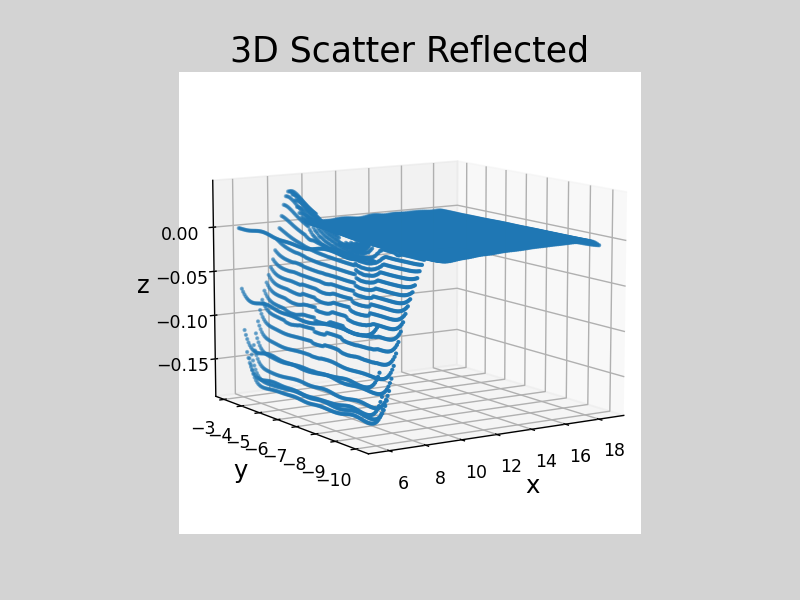

In [20]:
plt.figure("DevX", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('3D Scatter Reflected', fontsize=20)
ax3d.set_xlabel('x', fontsize=14)
ax3d.set_ylabel('y', fontsize=14)
ax3d.set_zlabel('z', fontsize=14)
plt.tick_params(labelsize=10)
ax3d.scatter(xPlot, yPlot, Dev_x, s = 2)
plt.show()

<IPython.core.display.Javascript object>


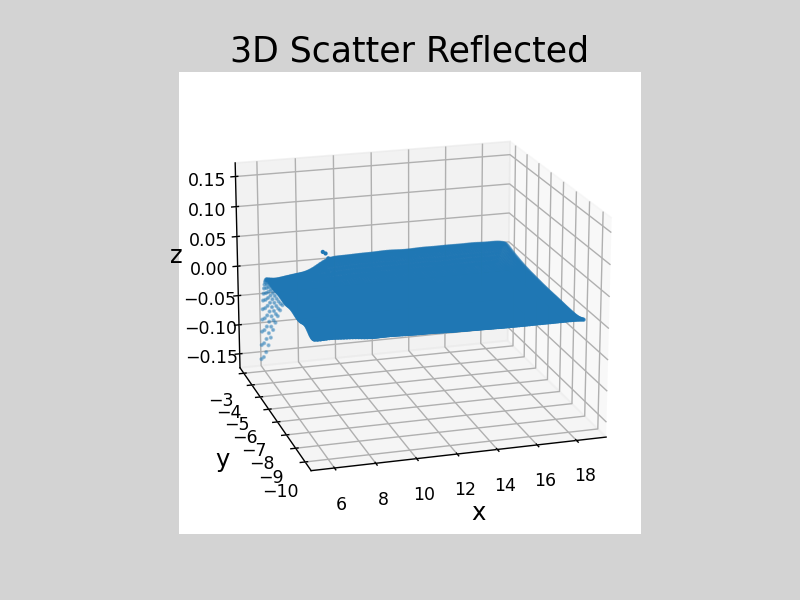

In [21]:
plt.figure("DevY", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('3D Scatter Reflected', fontsize=20)
ax3d.set_xlabel('x', fontsize=14)
ax3d.set_ylabel('y', fontsize=14)
ax3d.set_zlabel('z', fontsize=14)
plt.tick_params(labelsize=10)
ax3d.scatter(xPlot, yPlot, Dev_y, s = 2)
plt.show()

In [22]:
DevPy = pd.DataFrame({'Dev_x':Dev_x, 'Dev_y':Dev_y})
DevPy.to_csv("DevPy.csv", index = False, sep = ',')

In [23]:
W_GauijFixT = copy.deepcopy(W_GauijFix.transpose())
W_GauijFixT = np.array(W_GauijFixT)[0, :]

Gauij_dev_xT = copy.deepcopy(Gauij_dev_x.transpose())
Gauij_dev_xT = np.array(Gauij_dev_xT)[0, :]

Gauij_dev_yT = copy.deepcopy(Gauij_dev_y.transpose())
Gauij_dev_yT = np.array(Gauij_dev_yT)[0, :]

<IPython.core.display.Javascript object>


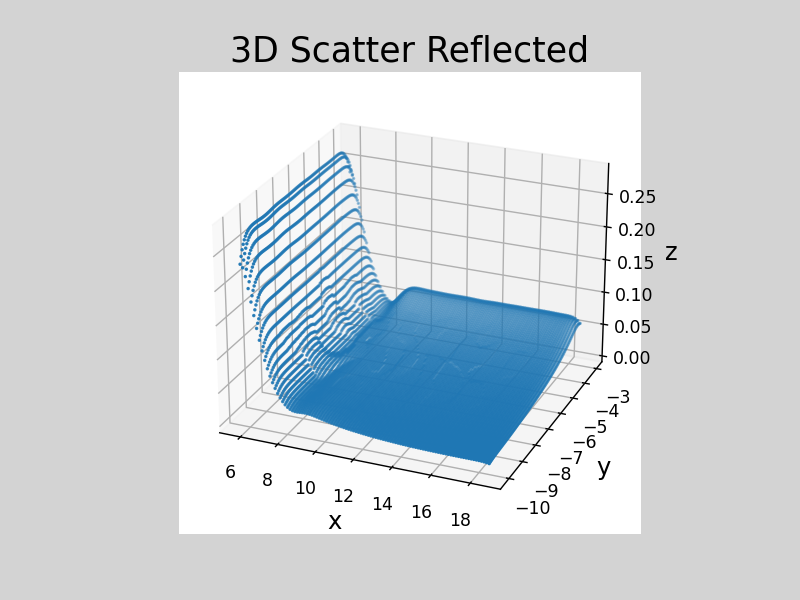

In [24]:
plt.figure("3D Scatter Smoothed", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('3D Scatter Reflected', fontsize=20)
ax3d.set_xlabel('x', fontsize=14)
ax3d.set_ylabel('y', fontsize=14)
ax3d.set_zlabel('z', fontsize=14)
plt.tick_params(labelsize=10)
ax3d.scatter(xPlot, yPlot, W_GauijFixT, s = 1)
plt.show()

In [25]:
lenDD = len(Gauij_dev_xT)
# lenDD = 1

DD1 = copy.deepcopy(Gauij_dev_xT)
DD2 = copy.deepcopy(Gauij_dev_yT)

Count = 0
LastEigenvector = np.zeros((lenDD, 2))
LastEigenvectorABS = np.zeros((lenDD, 2))
for i in range(lenDD):
    pFpi = np.vstack((DD1[i], DD2[i]))
    WW = np.outer(pFpi, pFpi.transpose())
    Eigenvalues, Eigenvectors = np.linalg.eig(WW)
    vesSwitch = copy.deepcopy(Eigenvectors[:,1])
#     print(Eigenvectors)
    if Eigenvalues[0] > Eigenvalues[1]:
        Count = Count + 1
        Buffer = copy.deepcopy(vesSwitch[0])  
        vesSwitch[0] = vesSwitch[1]
        vesSwitch[1] = Buffer
#     LastEigenvector[i, 0] = vesSwitch[0]
#     LastEigenvector[i, 1] = vesSwitch[1]
    LastEigenvectorABS[i, 0] = abs(vesSwitch[0])
    LastEigenvectorABS[i, 1] = abs(vesSwitch[1])
    
EigenFrame = pd.DataFrame({'Ev_x':LastEigenvectorABS[:, 0], 'Ev_y':LastEigenvectorABS[:, 1]})
EigenFrame.to_csv("Ev.csv", index = False, sep = ',')

In [26]:
print(DD1[0], DD2[0])
print(pFpi)
print(WW)
print(Eigenvalues)
print(Eigenvectors)

0.0010753515567948093 0.15035178755089643
[[-0.03435034]
 [-0.0214486 ]]
[[0.00117995 0.00073677]
 [0.00073677 0.00046004]]
[0.00163999 0.        ]
[[ 0.84822416 -0.52963739]
 [ 0.52963739  0.84822416]]


<IPython.core.display.Javascript object>


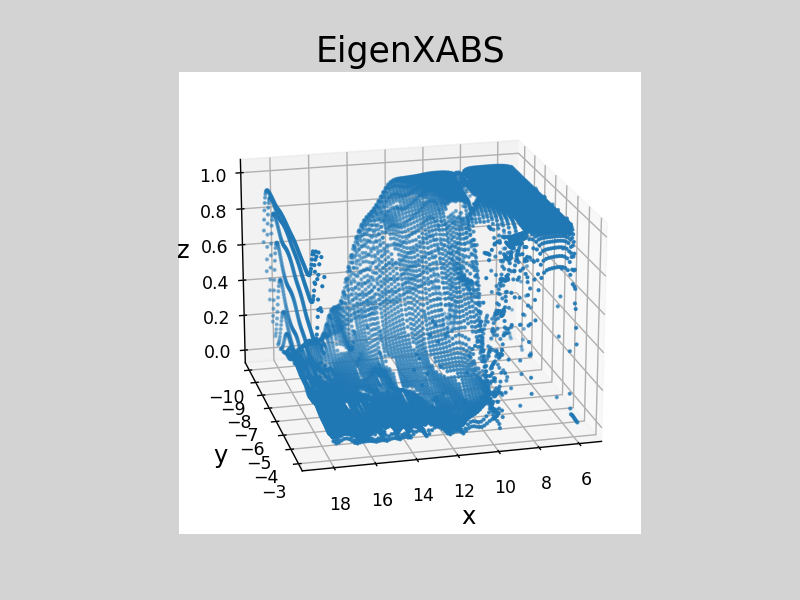

/tmp/ipykernel_6421/2779554232.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure("EigenYABS", facecolor = 'lightgray')


<IPython.core.display.Javascript object>


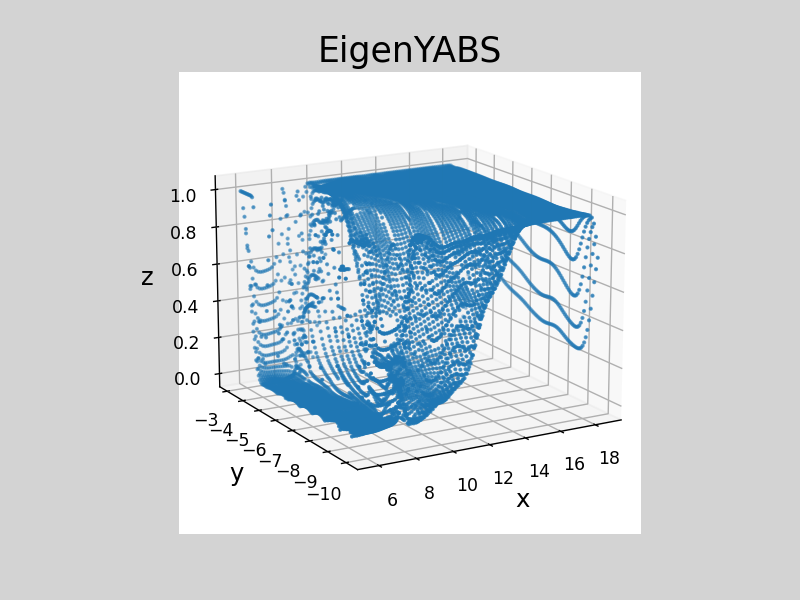

In [36]:
plt.figure("EigenXABS", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('EigenXABS', fontsize=20)
ax3d.set_xlabel('x', fontsize=14)
ax3d.set_ylabel('y', fontsize=14)
ax3d.set_zlabel('z', fontsize=14)
plt.tick_params(labelsize=10)
ax3d.scatter(xPlot, yPlot, LastEigenvectorABS[:, 0], s = 2)
plt.show()

plt.figure("EigenYABS", facecolor = 'lightgray')
ax3d = plt.subplot(projection = '3d')
plt.title('EigenYABS', fontsize=20)
ax3d.set_xlabel('x', fontsize=14)
ax3d.set_ylabel('y', fontsize=14)
ax3d.set_zlabel('z', fontsize=14)
plt.tick_params(labelsize=10)
ax3d.scatter(xPlot, yPlot, LastEigenvectorABS[:, 1], s = 2)
plt.show()

In [28]:
from pylab import *
import operator
import random

df_full = pd.read_csv("Ev.csv")
columns = list(df_full.columns)
features = columns[:len(columns)]
df = df_full[features]

num_attr = len(df.columns)

k = 2

MAX_ITER = 100
n = len(df) 
m = 3.00
print(features)
print(df)
print(num_attr)
print(n)


['Ev_x', 'Ev_y']
          Ev_x      Ev_y
0     0.007152  0.999974
1     0.009782  0.999952
2     0.013203  0.999913
3     0.017566  0.999846
4     0.022951  0.999737
...        ...       ...
9995  0.980170  0.198157
9996  0.998990  0.044940
9997  0.989723  0.142999
9998  0.938631  0.344923
9999  0.848224  0.529637

[10000 rows x 2 columns]
2
10000


In [29]:
def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x / summation for x in random_num_list] 
        membership_mat.append(temp_list)
    return membership_mat


def calculateClusterCenter(membership_mat):
    cluster_mem_val = zip(*membership_mat)
    cluster_centers = list()
    cluster_mem_val_list = list(cluster_mem_val)
    for j in range(k):
        x = cluster_mem_val_list[j]
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z / denominator for z in numerator]  
        cluster_centers.append(center)
    return cluster_centers


def updateMembershipValue(membership_mat, cluster_centers):
    data = []
    for i in range(n):
        x = list(df.iloc[i])
        data.append(x)
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j] / distances[c]), 2) for c in range(k)])
            membership_mat[i][j] = float(1 / den)
    return membership_mat, data



def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels


def fuzzyCMeansClustering():
    
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:  
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat, data = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    print(membership_mat)
    return cluster_labels, cluster_centers, data, membership_mat


def xie_beni(membership_mat, center, data):
    sum_cluster_distance = 0
    min_cluster_center_distance = inf
    for i in range(k):
        for j in range(n):
            sum_cluster_distance = sum_cluster_distance + membership_mat[j][i] ** 2 * sum(
                power(data[j, :] - center[i, :], 2))  
    for i in range(k - 1):
        for j in range(i + 1, k):
            cluster_center_distance = sum(power(center[i, :] - center[j, :], 2))  # 计算类间距离
            if cluster_center_distance < min_cluster_center_distance:
                min_cluster_center_distance = cluster_center_distance
    return sum_cluster_distance / (n * min_cluster_center_distance)


labels, centers, data, membership = fuzzyCMeansClustering()
print(labels)
print(centers)
center_array = array(centers)
label = array(labels)
datas = array(data)


[[0.00776301433972491, 0.9922369856602752], [0.007435799332475162, 0.9925642006675247], [0.007019118801304388, 0.9929808811986955], [0.006502599861779108, 0.9934974001382209], [0.005888791893645866, 0.9941112081063541], [0.005206930680529407, 0.9947930693194706], [0.004533374245381251, 0.9954666257546189], [0.0040237927975750026, 0.9959762072024251], [0.0039972951328274475, 0.9960027048671727], [0.0053251448747925045, 0.9946748551252076], [0.006059105877751854, 0.9939408941222482], [0.00431190619391198, 0.995688093806088], [0.8512097495202771, 0.14879025047972289], [0.7117468166581883, 0.28825318334181166], [0.33700838233022523, 0.6629916176697748], [0.24103848685773346, 0.7589615131422666], [0.2160807339468954, 0.7839192660531047], [0.22300690574146248, 0.7769930942585376], [0.26171425274705634, 0.7382857472529436], [0.35920431974400424, 0.6407956802559958], [0.59736979299041, 0.40263020700959], [0.9739851622055536, 0.026014837794446452], [0.8595078785325854, 0.14049212146741463], [0.

In [30]:
print(datas)

[[0.00715205 0.99997442]
 [0.00978172 0.99995216]
 [0.01320256 0.99991284]
 ...
 [0.98972281 0.14299915]
 [0.93863092 0.34492317]
 [0.84822416 0.52963739]]


<IPython.core.display.Javascript object>


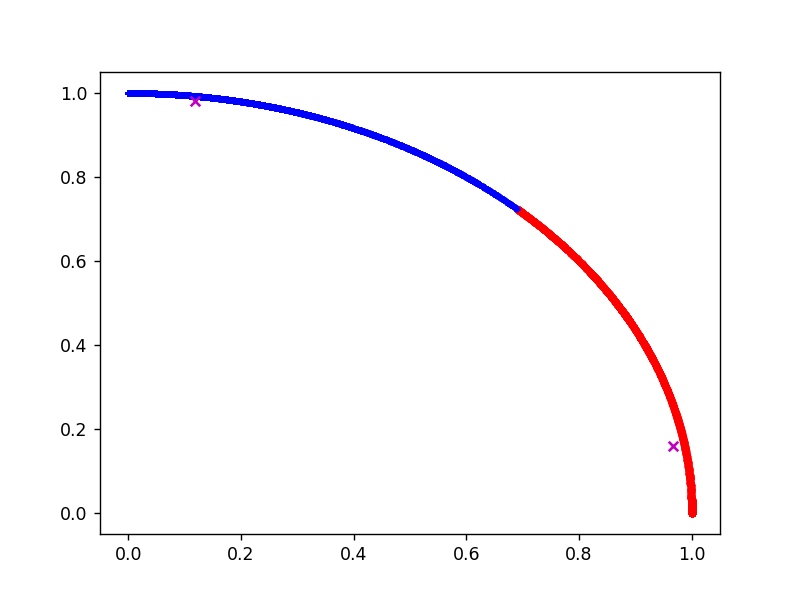

In [31]:

fig = plt.gcf()
fig.set_size_inches(16.5, 12.5)
f1 = plt.figure()
plt.scatter(datas[nonzero(label == 0), 0], datas[nonzero(label == 0), 1], marker='o', color='r', label='0', s=10)
plt.scatter(datas[nonzero(label == 1), 0], datas[nonzero(label == 1), 1], marker='+', color='b', label='1', s=10)
# plt.scatter(datas[nonzero(label == 2), 1], datas[nonzero(label == 2), 2], marker='*', color='g', label='2', s=10)
plt.scatter(center_array[:, 0], center_array[:, 1], marker='x', color='m', s=30)
plt.show()

In [32]:
print(xPlot)

[ 5.80903371  5.80903371  5.80903371 ... 18.58243604 18.58243604
 18.58243604]


/tmp/ipykernel_6421/1886895182.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f1 = plt.figure()


<IPython.core.display.Javascript object>


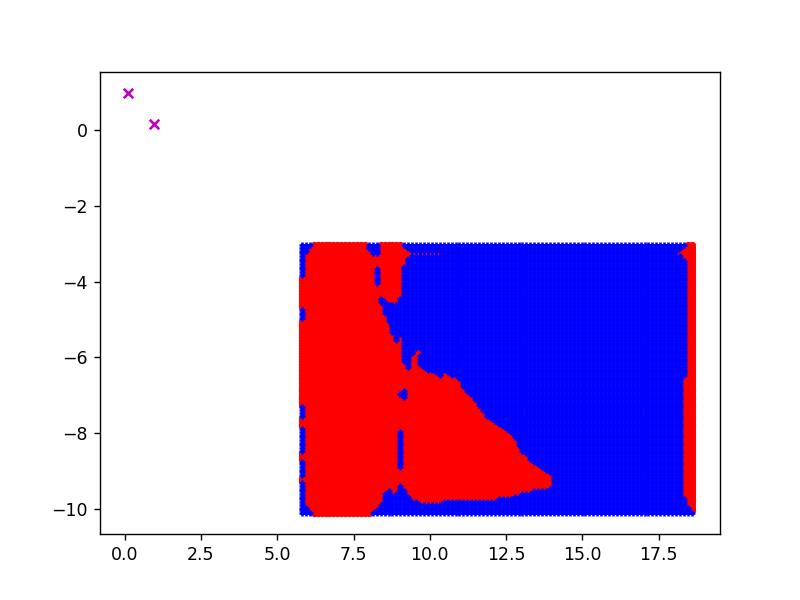

In [33]:
f1 = plt.figure()
plt.scatter(xPlot[nonzero(label == 0)], yPlot[nonzero(label == 0)], marker='o', color='r', label='0', s=10)
plt.scatter(xPlot[nonzero(label == 1)], yPlot[nonzero(label == 1)], marker='+', color='b', label='1', s=10)
# plt.scatter(datas[nonzero(label == 2), 1], datas[nonzero(label == 2), 2], marker='*', color='g', label='2', s=10)
plt.scatter(center_array[:, 0], center_array[:, 1], marker='x', color='m', s=30)
plt.show()

In [34]:
import numpy as np
import pysindy as ps

x1FIT = xPlot[nonzero(label == 0)]
y1FIT = yPlot[nonzero(label == 0)]
XY1FIT = np.stack((x1FIT, y1FIT), axis=-1)
t1 = len(x1FIT)
t11 = np.linspace(0, 1, t1)

x1SINDy = ps.SINDy(feature_names = ['a', 'b'])
x1SINDy.fit(XY1FIT, t = t11)
x1SINDy.print()

(a)' = 58.877 1 + 23.707 a + 57.587 b + -0.364 a^2 + 1.571 a b + 5.226 b^2
(b)' = -6035.614 1 + -63.691 a + -2102.786 b + 2.117 a^2 + -3.082 a b + -160.700 b^2


In [35]:
x2FIT = xPlot[nonzero(label == 1)]
y2FIT = yPlot[nonzero(label == 1)]
XY2FIT = np.stack((x2FIT, y2FIT), axis=-1)
t2 = len(x2FIT)
t22 = np.linspace(0, 1, t2)

x2SINDy = ps.SINDy(feature_names = ['a', 'b'])
x2SINDy.fit(XY2FIT, t = t22)
x2SINDy.print()

(a)' = 555.617 1 + -38.533 a + 91.933 b + 1.123 a^2 + -0.915 a b + 6.053 b^2
(b)' = -7825.947 1 + -444.476 a + -3727.505 b + 16.202 a^2 + 5.435 a b + -278.254 b^2
